In [1]:

import numpy as np  # Importing NumPy for numerical operations and array manipulations
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting graphs and visualizations
import seaborn as sns  # Importing Seaborn for statistical data visualization, built on top of Matplotlib
import tensorflow as tf  # Importing TensorFlow for building and training machine learning models
from tensorflow import keras  # Importing Keras, a high-level API for TensorFlow, to simplify model building
from tensorflow.keras import Layer  # Importing Layer class for creating custom layers in Keras
from tensorflow.keras.models import Sequential  # Importing Sequential model for building neural networks layer-by-layer
from tensorflow.keras.layers import Rescaling , GlobalAveragePooling2D
from tensorflow.keras import layers, optimizers, callbacks  # Importing various modules for layers, optimizers, and callbacks in Keras
from sklearn.utils.class_weight import compute_class_weight  # Importing function to compute class weights for imbalanced datasets
from tensorflow.keras.applications import EfficientNetV2B2  # Importing EfficientNetV2S model for transfer learning
from sklearn.metrics import confusion_matrix, classification_report  # Importing functions to evaluate model performance
import gradio as gr  # Importing Gradio for creating interactive web interfaces for machine learning models

In [2]:
from google.colab import files
uploaded = files.upload()

Saving TrashType_Image_Dataset.zip to TrashType_Image_Dataset.zip


In [3]:
!unzip TrashType_Image_Dataset.zip -d /content/dataset

Archive:  TrashType_Image_Dataset.zip
   creating: /content/dataset/TrashType_Image_Dataset/
   creating: /content/dataset/TrashType_Image_Dataset/cardboard/
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_001.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_002.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_003.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_004.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_005.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_006.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_007.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_008.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_009.jpg  
  inflating: /content/dataset/TrashType_Image_Dataset/cardboard/cardboard_010.jpg  
  

In [4]:
import tensorflow as tf

data_dir = "/content/dataset/TrashType_Image_Dataset"
img_size = (124, 124)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [6]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


In [7]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras import layers, models

# Load base model without the top layer
base_model = EfficientNetV2B2(input_shape=(124, 124, 3),
                              include_top=False,
                              weights='imagenet')
base_model.trainable = True  # Fine-tune the base model

# Optionally freeze initial layers
for layer in base_model.layers[:200]:
    layer.trainable = False

# Build the model
model = models.Sequential([
    data_augmentation,                   # Apply augmentation
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(6, activation='softmax')  # 6 classes
])


35839040/35839040 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.callbacks import EarlyStopping

In [13]:
# First: load the dataset and keep a reference to original for class names
raw_train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path + "/train",
    image_size=(124, 124),
    batch_size=32
)

# Then: apply caching and prefetching
train_ds = raw_train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Now you can safely access class names
class_names = raw_train_ds.class_names
num_classes = len(class_names)

NameError: name 'dataset_path' is not defined

In [14]:
import zipfile
import os

# Replace with the correct file name if it's different
zip_path = "/content/TrashType_Image_Dataset.zip"

# Unzip it to /content/
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/")

In [15]:
import os

# List directories inside /content/
print(os.listdir("/content"))

['.config', 'TrashType_Image_Dataset.zip', 'TrashType_Image_Dataset', 'dataset', 'sample_data']


In [16]:
dataset_path = "/content/[TrashType_Image_Dataset.zip]"

In [17]:
dataset_path = "/content/TrashType_Image_Dataset"

raw_train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    image_size=(124, 124),
    batch_size=32
)

train_ds = raw_train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

class_names = raw_train_ds.class_names
num_classes = len(class_names)

print("Classes:", class_names)
print("Number of classes:", num_classes)


Found 2527 files belonging to 6 classes.
Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
Number of classes: 6


In [18]:
# Load training and validation datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,           # 20% for validation
    subset="training",
    seed=123,
    image_size=(124, 124),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(124, 124),
    batch_size=32
)


Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [19]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
# Load the datasets first
raw_train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(124, 124),
    batch_size=32
)

raw_val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(124, 124),
    batch_size=32
)

# ✅ Extract class names before prefetching
class_names = raw_train_ds.class_names
print("Classes:", class_names)

# Prefetch datasets (after extracting class names)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = raw_train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = raw_val_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.
Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [21]:
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

def preprocess(image, label):
    image = preprocess_input(image)
    return image, label

train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)


In [22]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras import layers, models

# Load EfficientNetV2B2 base (without top classification layer)
base_model = EfficientNetV2B2(
    input_shape=(124, 124, 3),
    include_top=False,
    weights='imagenet'  # Pretrained weights
)

# Freeze the base model
base_model.trainable = False

# Build the full model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(6, activation='softmax')  # 6 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Show the model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b2 (Functional)  │ (None, 4, 4, 1408)     │     8,769,374 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1408)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       180,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,950,500 (34.14 MB)

 Trainable params: 181,126 (707.52 KB)

 Non-trainable params: 8,769,374 (33.45 MB)

In [23]:
import tensorflow as tf
import os

dataset_path = "/content/dataset"
IMG_SIZE = (124, 124)
BATCH_SIZE = 32


In [25]:
import os, shutil
import random

original_path = "/content/TrashType_Image_Dataset"
output_base = "/content/dataset"
split_ratio = (0.7, 0.2, 0.1)  # 70% train, 20% val, 10% test

# Create folders for train/val/test
for split in ['train', 'val', 'test']:
    for class_name in os.listdir(original_path):
        class_dir = os.path.join(original_path, class_name)
        if not os.path.isdir(class_dir): continue
        os.makedirs(os.path.join(output_base, split, class_name), exist_ok=True)

# Move files into respective folders
for class_name in os.listdir(original_path):
    class_dir = os.path.join(original_path, class_name)
    if not os.path.isdir(class_dir): continue

    images = os.listdir(class_dir)
    random.shuffle(images)

    train_end = int(len(images) * split_ratio[0])
    val_end = train_end + int(len(images) * split_ratio[1])

    for i, img in enumerate(images):
        src = os.path.join(class_dir, img)
        if i < train_end:
            dest = os.path.join(output_base, 'train', class_name, img)
        elif i < val_end:
            dest = os.path.join(output_base, 'val', class_name, img)
        else:
            dest = os.path.join(output_base, 'test', class_name, img)
        shutil.copy(src, dest)


In [26]:
!ls /content/dataset/train
!ls /content/dataset/val
!ls /content/dataset/test


cardboard  glass  metal  paper	plastic  trash
cardboard  glass  metal  paper	plastic  trash
cardboard  glass  metal  paper	plastic  trash


In [27]:
import tensorflow as tf

IMG_SIZE = (124, 124)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset/val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)


Found 1766 files belonging to 6 classes.
Found 503 files belonging to 6 classes.
Found 258 files belonging to 6 classes.


In [28]:
!pip install tensorflow


In [29]:
import os, shutil
import random

original_path = "/content/TrashType_Image_Dataset"
output_base = "/content/dataset"
split_ratios = (0.7, 0.2, 0.1)  # 70% train, 20% val, 10% test

# Create output directories
for split in ['train', 'val', 'test']:
    for class_name in os.listdir(original_path):
        os.makedirs(os.path.join(output_base, split, class_name), exist_ok=True)

# Split and move images
for class_name in os.listdir(original_path):
    images = os.listdir(os.path.join(original_path, class_name))
    random.shuffle(images)

    total = len(images)
    train_end = int(split_ratios[0] * total)
    val_end = int((split_ratios[0] + split_ratios[1]) * total)

    for i, img in enumerate(images):
        src = os.path.join(original_path, class_name, img)

        if i < train_end:
            dst = os.path.join(output_base, "train", class_name, img)
        elif i < val_end:
            dst = os.path.join(output_base, "val", class_name, img)
        else:
            dst = os.path.join(output_base, "test", class_name, img)

        shutil.copy(src, dst)

print("✅ Dataset split into train/val/test successfully.")


✅ Dataset split into train/val/test successfully.


In [30]:
import tensorflow as tf

IMG_SIZE = (124, 124)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE
dataset_path = "/content/dataset"

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path + "/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path + "/val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path + "/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

# Prefetch for performance
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 2310 files belonging to 6 classes.
Found 907 files belonging to 6 classes.
Found 492 files belonging to 6 classes.


In [31]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

# ✅ Optional: Data augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
], name="data_augmentation")

# ✅ Load base EfficientNetV2B2
base_model = EfficientNetV2B2(include_top=False, input_shape=(124, 124, 3), weights="imagenet")
base_model.trainable = True

# ✅ Freeze first 200 layers to retain features
for layer in base_model.layers[:200]:
    layer.trainable = False

# ✅ Build final model
model = Sequential([
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')  # 6 classes
])

# ✅ Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25
)


Epoch 1/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.2784 - loss: 1.7341 - val_accuracy: 0.7078 - val_loss: 1.0786
Epoch 2/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.6295 - loss: 1.0768 - val_accuracy: 0.8071 - val_loss: 0.6478
Epoch 3/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.7427 - loss: 0.7721 - val_accuracy: 0.8445 - val_loss: 0.4910
Epoch 4/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.7897 - loss: 0.6119 - val_accuracy: 0.8677 - val_loss: 0.4089
Epoch 5/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.8252 - loss: 0.4949 - val_accuracy: 0.8986 - val_loss: 0.3321
Epoch 6/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.8605 - loss: 0.4138 - val_accuracy: 0.9118 - val_loss: 0.2800
Epoch 7/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.8747 - loss: 0.3532 - val_accuracy: 0.9206 - val_loss: 0.2444
Epoch 8/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.8997 - loss: 0.3020 - val_accuracy: 0.9327 - v

In [32]:
# Evaluate model on test dataset
loss, accuracy = model.evaluate(test_ds)
print(f"✅ Test Accuracy: {accuracy:.4f}")
print(f"✅ Test Loss: {loss:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 733ms/step - accuracy: 0.9737 - loss: 0.1133
✅ Test Accuracy: 0.9675
✅ Test Loss: 0.1139


In [33]:
model.save("garbage_classifier_model.keras")


In [34]:
from google.colab import files
files.download("garbage_classifier_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

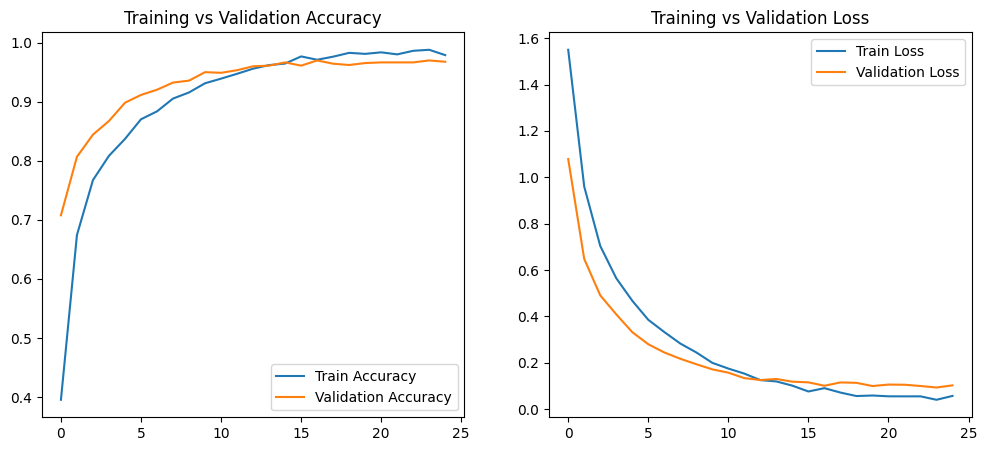

In [35]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()


In [37]:
# Temporarily reload test dataset without prefetching to access class names
test_ds_temp = tf.keras.utils.image_dataset_from_directory(
    "/content/dataset/test",         # use your test folder path
    image_size=(124, 124),
    batch_size=32,
    shuffle=False                    # don't shuffle for evaluation
)

class_names = test_ds_temp.class_names


Found 492 files belonging to 6 classes.


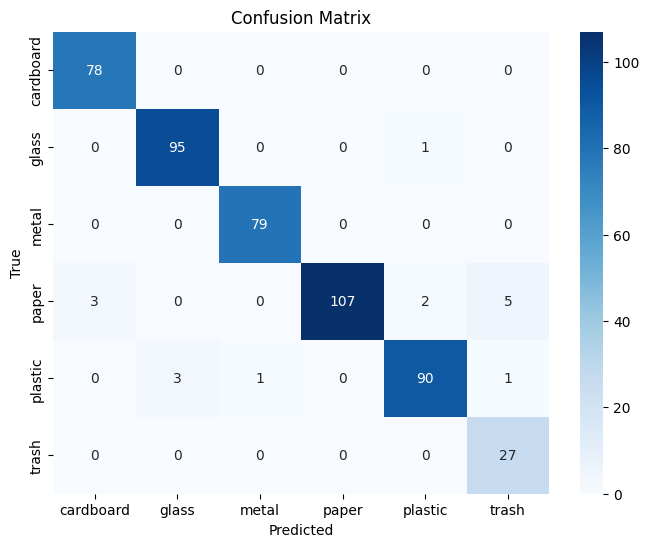

              precision    recall  f1-score   support

   cardboard       0.96      1.00      0.98        78
       glass       0.97      0.99      0.98        96
       metal       0.99      1.00      0.99        79
       paper       1.00      0.91      0.96       117
     plastic       0.97      0.95      0.96        95
       trash       0.82      1.00      0.90        27

    accuracy                           0.97       492
   macro avg       0.95      0.98      0.96       492
weighted avg       0.97      0.97      0.97       492



In [38]:
# Now use previously computed y_true and y_pred
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))


In [39]:
model.save("garbage_classifier_model.keras")


In [40]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from PIL import Image
import numpy as np

model = load_model("garbage_classifier_model.keras")
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

def classify_image(img):
    img = img.resize((124, 124))
    img_array = np.array(img, dtype=np.float32)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    index = np.argmax(predictions)
    return f"{class_names[index]} ({predictions[0][index]:.2f} confidence)"

iface = gr.Interface(fn=classify_image, inputs=gr.Image(type='pil'), outputs="text")
iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3a244f15c6bc96bb75.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
